In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm
# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [4]:
plt.rcParams['figure.figsize']=[20,20]

# Data Description

#Problem statement: company ABC they want to maintain their supply chain more efficiently so they have approached Data Analyst to predict the upcoming month’s trend using the historical Data of the previous year’s monthly wise by using EDA and machine learning algorithms for prediction.  
#Abstract (Executive summary): the company has wide category of products such as apple laptops, Bedsheets, Bed etc which has company data set which includes number of features 20, number of rows 51291 to analyse the sales forecast. 
#Methodology (Details of algorithms): a) we will use linear regression, random forest regression, KNN, SVM, Decision tree, regression models


# Data Preparation

Understand the Data

In [5]:
#Read the dataset and print the first five observations. 
# load the excel file 
# store the data in 'Data' 
df = pd.read_excel (r'Book.xlsx')
df.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.00,4.600,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.01,11.201,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.15,3.115,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.20,2.620,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.00,16.000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania


# Preprocessing

In [6]:
# How many data-points and features?
df.shape

(51290, 20)

Interpretation: The data has 51290 observations and 20 variables. 

In [7]:
# Let's use 'info()' to understand the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51290 non-null  object        
 1   Order Date        51290 non-null  datetime64[ns]
 2   Shipping Date     51290 non-null  datetime64[ns]
 3   Aging             51290 non-null  int64         
 4   Ship Mode         51290 non-null  object        
 5   Product Category  51290 non-null  object        
 6   Product           51290 non-null  object        
 7   Sales             51290 non-null  int64         
 8   Quantity          51290 non-null  int64         
 9   Discount          51290 non-null  float64       
 10  Profit            51290 non-null  float64       
 11  Shipping Cost     51290 non-null  float64       
 12  Order Priority    51290 non-null  object        
 13  Customer ID       51290 non-null  object        
 14  Customer Name     5129

In [8]:
df_num=df.select_dtypes(np.number)
df_num.head()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
0,8,140,2,0.05,46.00,4.600
1,2,211,3,0.03,112.01,11.201
2,8,117,5,0.01,31.15,3.115
3,7,118,2,0.05,26.20,2.620
4,9,250,1,0.04,160.00,16.000


In [9]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,Order ID,Ship Mode,Product Category,Product,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region
0,AU-2015-1,First Class,Auto & Accessories,Car Media Players,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania
1,AU-2015-2,First Class,Auto & Accessories,Car Speakers,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central
2,AU-2015-3,First Class,Auto & Accessories,Car Body Covers,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania
3,AU-2015-4,First Class,Auto & Accessories,Car & Bike Care,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia
4,AU-2015-5,First Class,Auto & Accessories,Tyre,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania


# Get a concise summary of the DataFrame.

In [10]:
# Summary statistics for numerical columns 
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Aging,51290.0,5.255040,2.959905,1.000,3.000,5.00,8.000,10.00
Sales,51290.0,156.431683,65.781374,33.000,109.000,159.00,218.000,250.00
Quantity,51290.0,2.997309,1.413453,1.000,2.000,3.00,4.000,5.00
Discount,51290.0,0.029971,0.014114,0.010,0.020,0.03,0.040,0.05
Profit,51290.0,72.721836,49.099328,0.510,25.730,67.00,120.560,167.50
Shipping Cost,51290.0,7.272184,4.909933,0.051,2.573,6.70,12.056,16.75


In [11]:
# Summary statistics for Categorical columns 
df_cat.describe().T 

,count,unique,top,freq
Order ID,51290,51290,AU-2015-1,1
Ship Mode,51290,4,Standard Class,30775
Product Category,51290,4,Fashion,30775
Product,51290,42,Sports Wear,2827
Order Priority,51290,4,Medium,29433
Customer ID,51290,51290,LS-001,1
Customer Name,51290,795,Mcclain O'Donnell,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001


Skewness is a statistical measure that describes the asymmetry of the probability distribution of a dataset. In the context of machine learning, understanding skewness is crucial as it can impact the performance and accuracy of various algorithms, as well as the interpretation of results

In [12]:
#Checking Duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

Interpretation there is no duplicated values in the given data set

# Missing data

In [13]:
# checking for null values
df.isnull().sum()

Order ID            0
Order Date          0
Shipping Date       0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
dtype: int64

Interpretation there is no null values in the given data set

In [14]:
#Skewness 
df.skew() 

Aging            0.065555
Sales           -0.157815
Quantity         0.000491
Discount         0.002195
Profit           0.177443
Shipping Cost    0.177443
dtype: float64

Interpretation
Aging: Skewness = 0.065555
Here given the skewness is 0.06, hence the distribution is moderately skewed
Quantity: Skewness =  0.000491 
• A skewness value of 0 suggests that the distribution of Quantity is approximately symmetric. This means that the Quantity are evenly distributed without a long tail on either side.
Discount: Skewness =  0.000491 
• A skewness value of 0 suggests that the distribution of Discount is approximately symmetric. This means that the Discount are evenly distributed without a long tail on either side

In [15]:
#kurtosis 
df.kurt()

Aging           -1.260121
Sales           -1.431842
Quantity        -1.298075
Discount        -1.294416
Profit          -1.492120
Shipping Cost   -1.492120
dtype: float64

In summary, kurtosis is a valuable tool in machine learning for understanding the distribu tional characteristics of data. It guides decision-making regarding data preprocessing, outlier handling, and model selection. However, it’s important to note that kurtosis is just one aspect of data analysis, and its interpretation should always be considered alongside other statistical measures and domain knowledge. 

# CORRELATION

In [16]:
 #Correlation 
df.corr()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
Aging,1.000000,0.014840,-0.002432,0.000129,0.015236,0.015236
Sales,0.014840,1.000000,-0.000512,-0.007250,0.921502,0.921502
Quantity,-0.002432,-0.000512,1.000000,0.007170,-0.176294,-0.176294
Discount,0.000129,-0.007250,0.007170,1.000000,-0.119111,-0.119111
Profit,0.015236,0.921502,-0.176294,-0.119111,1.000000,1.000000
Shipping Cost,0.015236,0.921502,-0.176294,-0.119111,1.000000,1.000000


Interpretation None of the variables are highly correlated.

In [17]:
df.cov().T

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
Aging,8.761037,2.889453,-0.010174,0.000005,2.214228,0.221423
Sales,2.889453,4327.189127,-0.047640,-0.006731,2976.287140,297.628714
Quantity,-0.010174,-0.047640,1.997848,0.000143,-12.234759,-1.223476
Discount,0.000005,-0.006731,0.000143,0.000199,-0.082543,-0.008254
Profit,2.214228,2976.287140,-12.234759,-0.082543,2410.743970,241.074397
Shipping Cost,0.221423,297.628714,-1.223476,-0.008254,241.074397,24.107440


# Numerical 

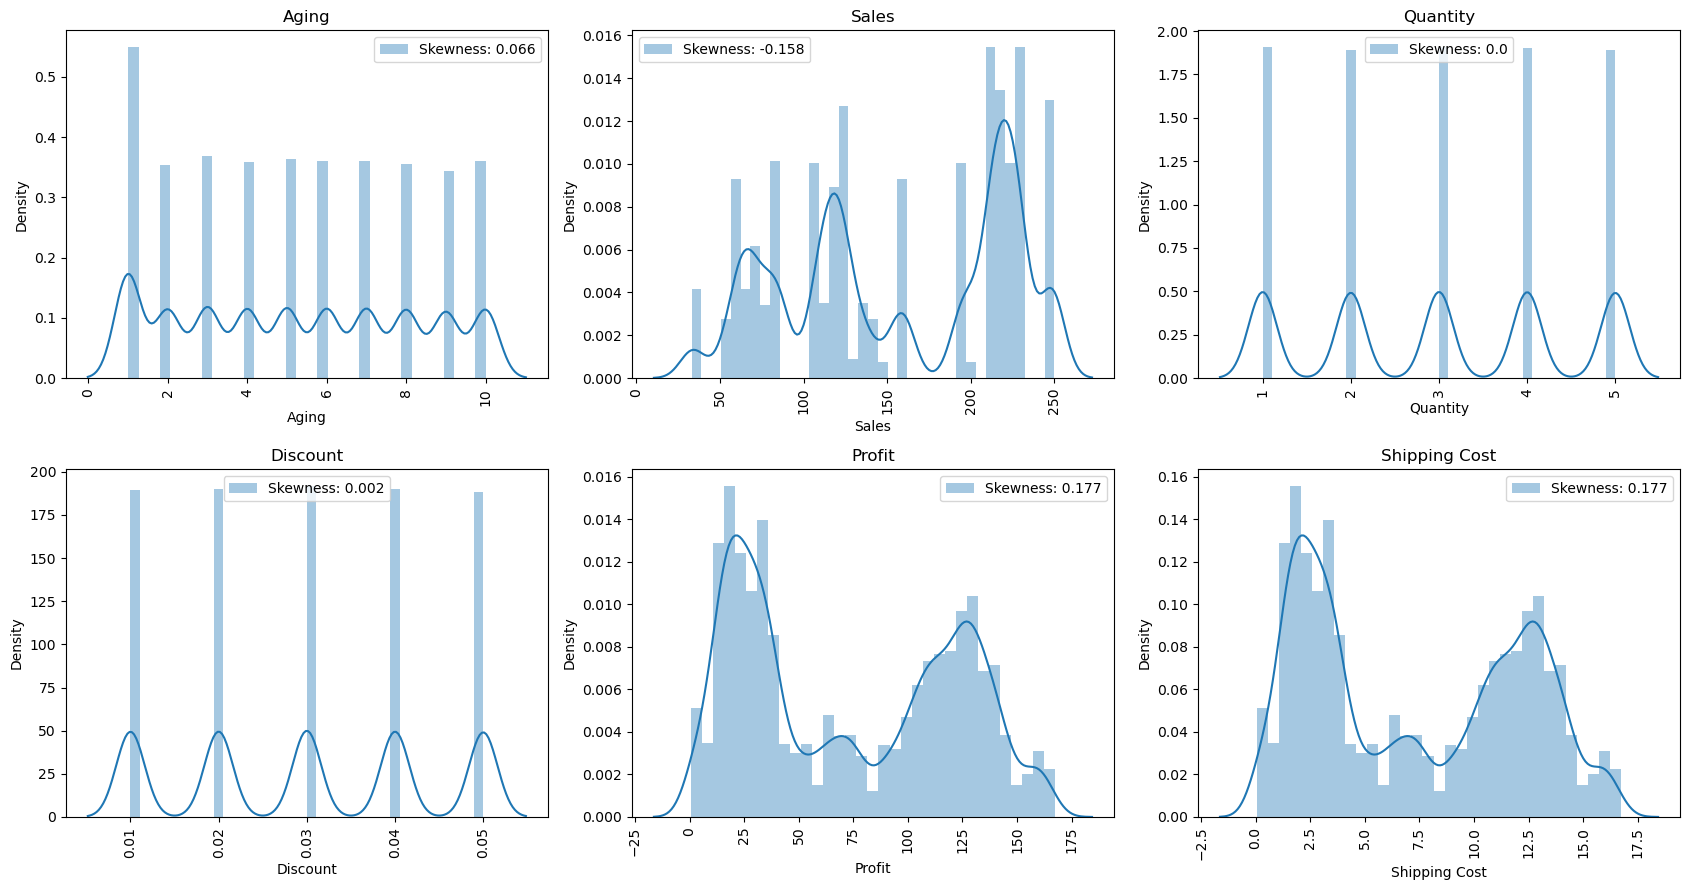

In [18]:
plt.rcParams['figure.figsize']=[17,9] 
rows=2 
columns=3 
iterator=1 
for k in df_num.columns:
    plt.subplot(rows,columns,iterator) 
    sns.distplot(df.loc[:,k],label= 'Skewness:'+' '+str(round(df[k].skew(),3)))
    plt.title(k) 
    plt.legend() 
    iterator+=1 
    plt.xticks(rotation=90) 
plt.tight_layout() 

Interpretation:

Profit is highly right skewed.

Shipping Cost is highly right skewed

Aging also right skewewd

Discount and Qunatity normal distribution

Sales slighly left skewed

# Checking for outliers

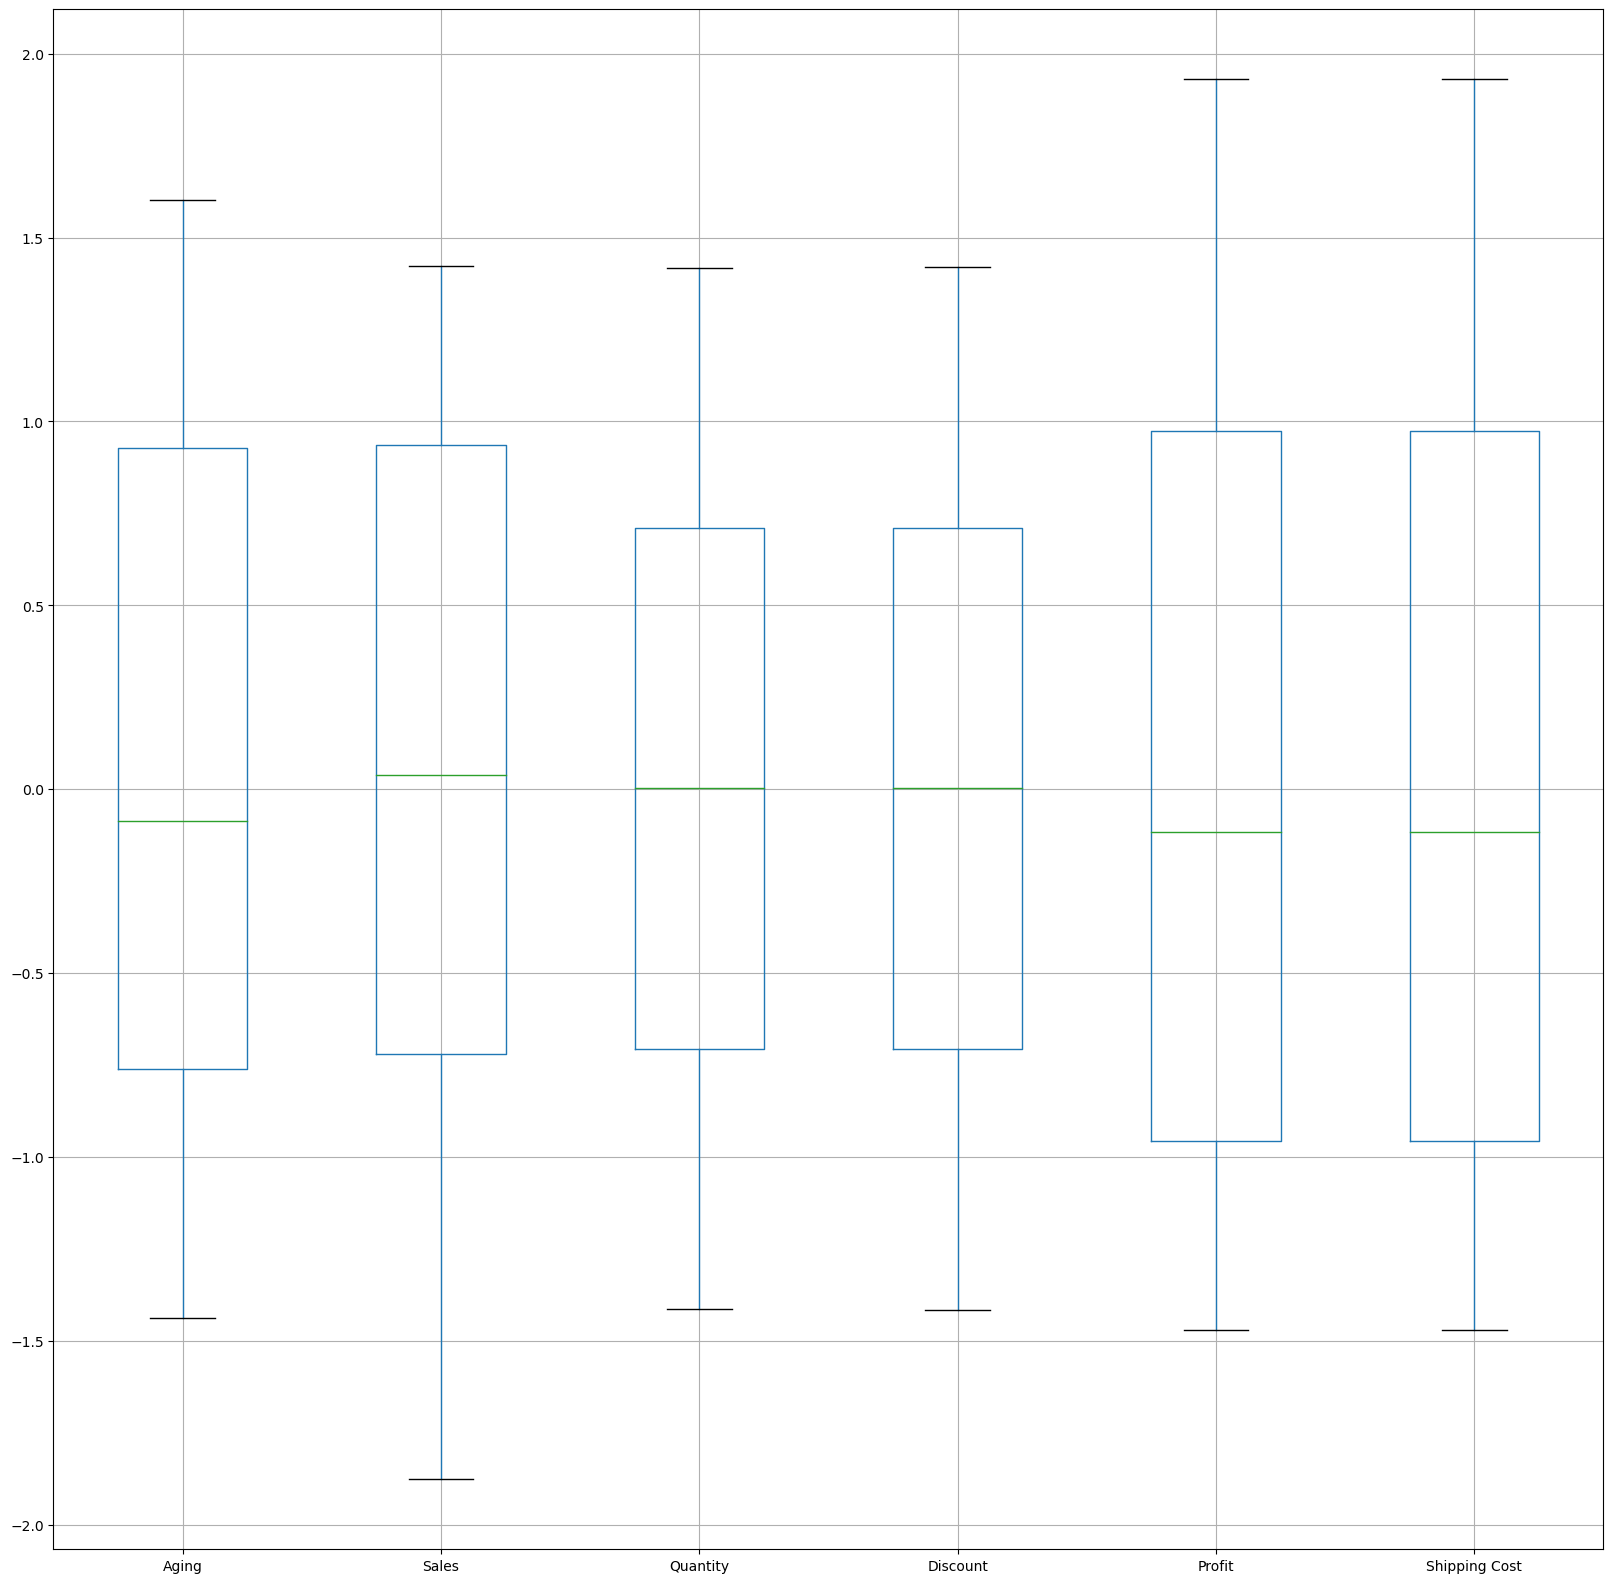

In [19]:
from scipy.stats import zscore
plt.figure(figsize=(20,20))
df.select_dtypes(np.number).apply(zscore).boxplot()
plt.show()

Interpretation * Aging, Sales, Quantity, Discount, Profit, Shipping Cost since have no outliers. 

# Univariate Analysis

In [20]:
df.Product.value_counts().head()

Sports Wear     2827
Fossil Watch    2796
Titak watch     2795
Sneakers        2795
Formal Shoes    2795
Name: Product, dtype: int64

Interpretation: product sports wear sold the most in year 2015

In [21]:
df.Product.value_counts().tail(10)

LED               224
LCD               224
Iron              221
Watch             221
Samsung Mobile    221
Tablet            221
Mouse             221
Keyboard          221
Apple Laptop      221
Fans              221
Name: Product, dtype: int64

Interpretation: least sold products with a count of 221 products for the year

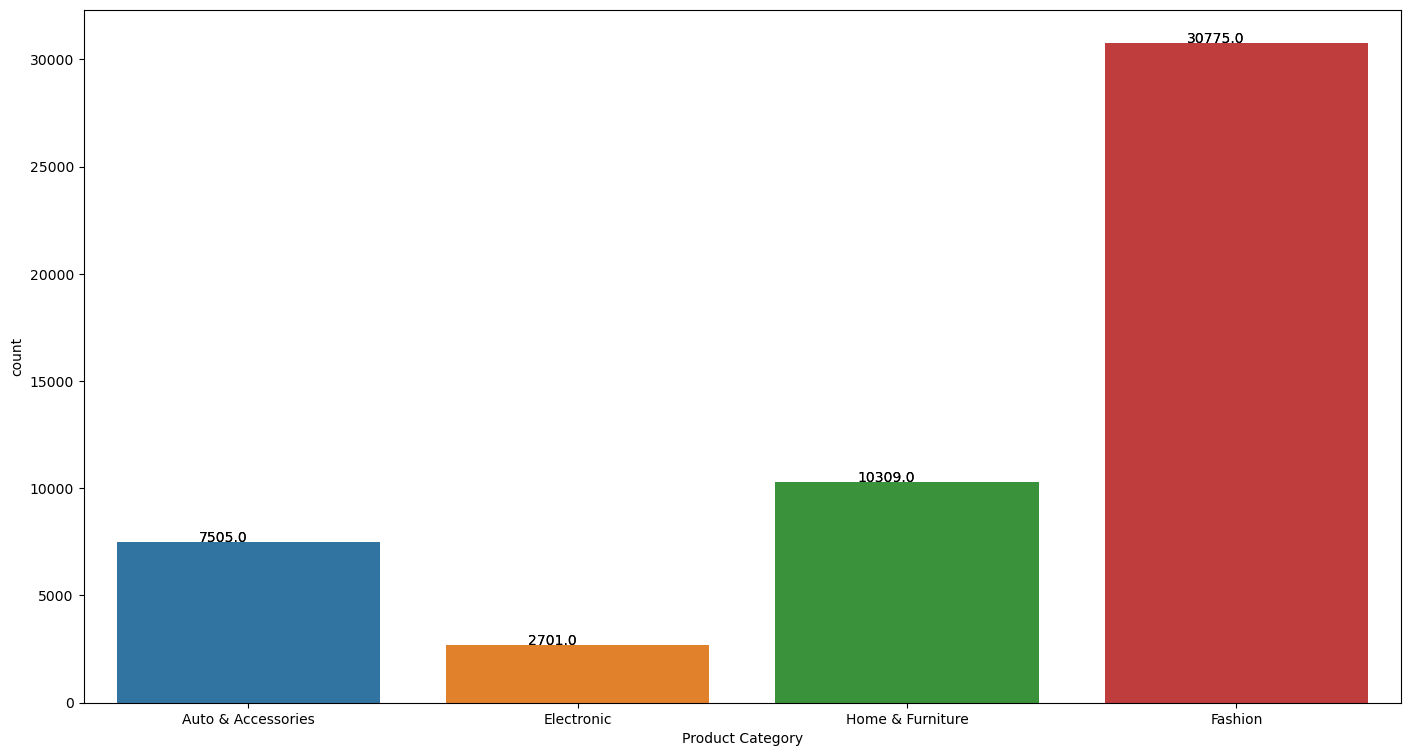

In [22]:
sns.countplot(x = 'Product Category',data = df)
ax = sns.countplot(x='Product Category', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Interpretation: Product category "Fashion" sold the most and least sold is "electronic"

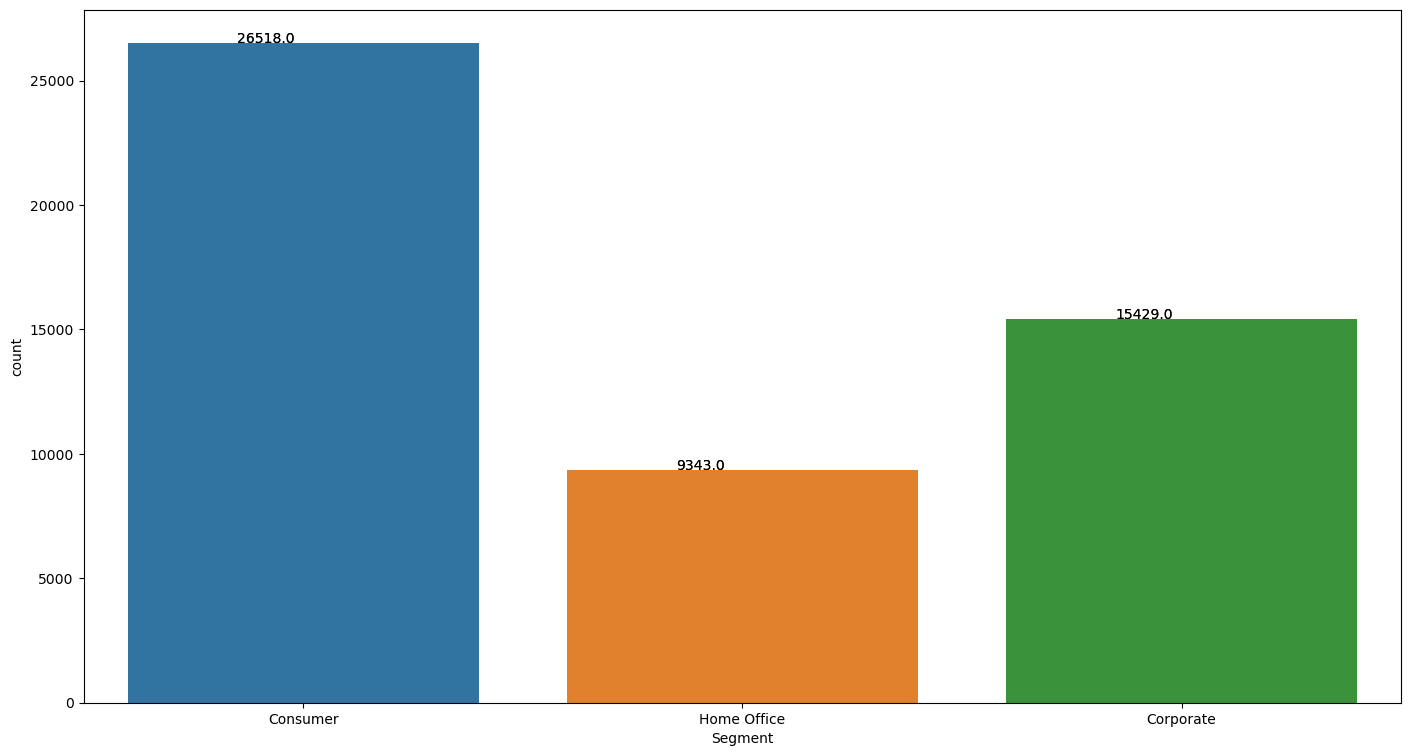

In [23]:
sns.countplot(x = 'Segment',data = df)
ax = sns.countplot(x='Segment', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Interpretation: Segment wise "Consumer" products sold the most and least sold is "Home Office Segment" products

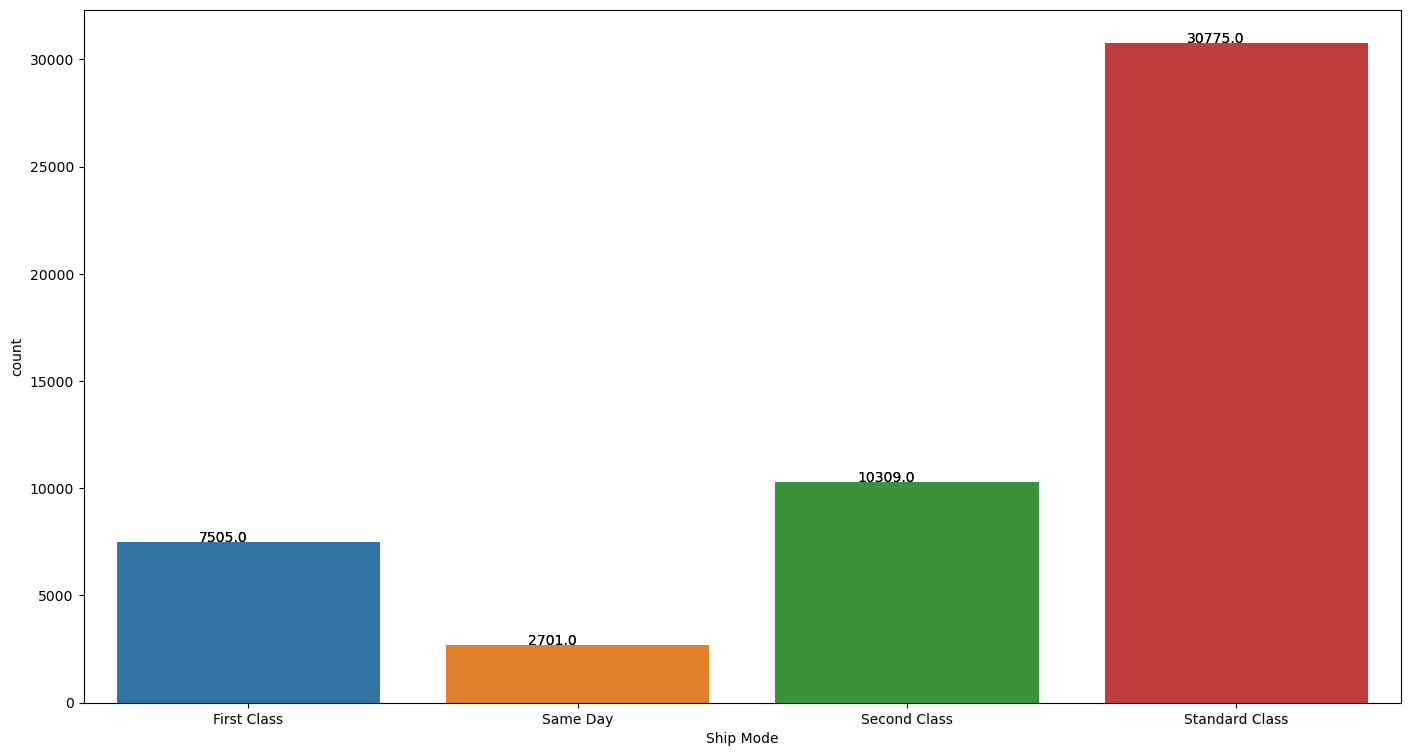

In [24]:
sns.countplot(x = 'Ship Mode',data = df)
ax = sns.countplot(x='Ship Mode', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Interpretation: most products are shipped "standard class" , least products shipped are on "Same day"

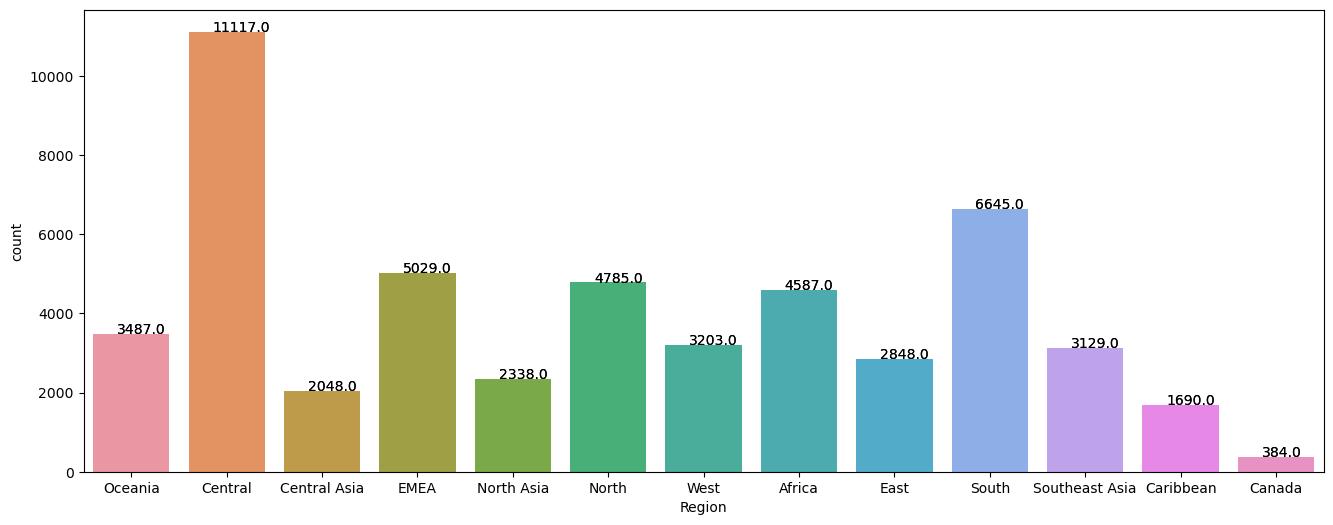

In [25]:
plt.figure(figsize=[16,6])
sns.countplot(x = 'Region',data = df)
ax = sns.countplot(x='Region', data=df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Interpretation: most orders are from "Central" and least orders are from "Canada"
#Note: Sales and quantity wise may vary

In [26]:
df['Customer Name'].value_counts().head()

Mcclain O'Donnell    108
Spears Thornton      106
Flores Brooks        102
Bates Gockenbach     102
Booth Pistole        102
Name: Customer Name, dtype: int64

Interpretation: #Most order ID created for Mcclain O'Donnell
               #Note: Sales and Quantity wise Customer may vary

In [27]:
df['Customer Name'].value_counts().tail()

Fleming Foster        35
Wheeler Donatelli     34
Beasley Pawlan        31
Kelley Devincentis    31
Oconnor Nelson        29
Name: Customer Name, dtype: int64

Interpretation: #Least order ID created for Oconnor Nelson
               #Note: Sales and Quantity wise Customer may vary

# Bivariate Analysis

Quantitative and Quantitative Analysis

In [28]:
data = df
data['month'] = data['Order Date'].dt.month
data.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,month
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.00,4.600,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,11
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.01,11.201,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,6
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.15,3.115,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,12
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.20,2.620,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,5
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.00,16.000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,7


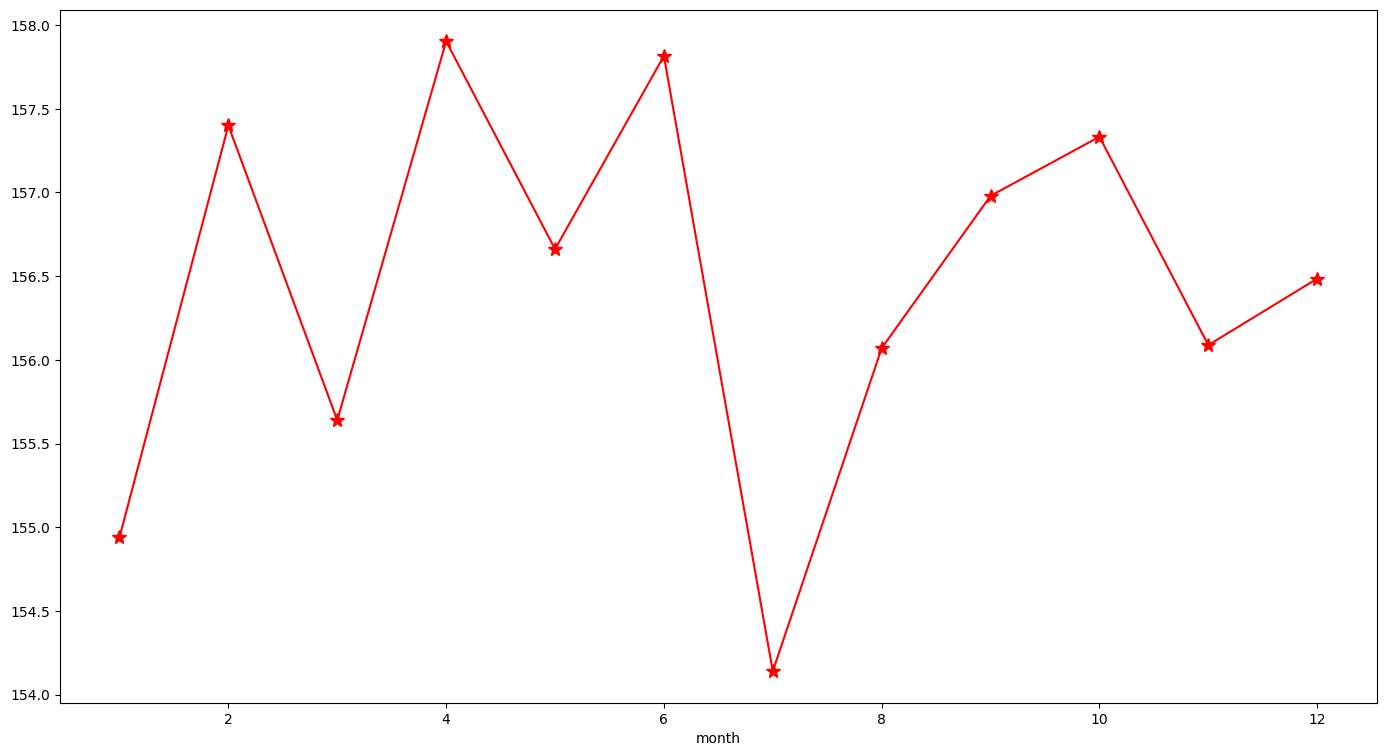

<Figure size 1600x600 with 0 Axes>

In [29]:
data.groupby('month')['Sales'].mean().plot(marker='*',markersize=10,color='red')
plt.figure(figsize=[16,6])
plt.show()

Interpretation: #Avg sales are high in April(4) and low in July(7)

In [30]:
data.groupby(['month'])['Sales'].mean().sort_values(ascending = False)

month
4     157.903257
6     157.815246
2     157.400052
10    157.332420
9     156.979747
5     156.661309
12    156.485211
11    156.088186
8     156.069800
3     155.639393
1     154.939977
7     154.139933
Name: Sales, dtype: float64

Interpretation: #Avg sales are high in April(4) and low in July(7)

In [31]:
data_1 = data
data_1['day'] = data_1['Order Date'].dt.day
data_1.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,month,day
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.00,4.600,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,11,9
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.01,11.201,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,6,30
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.15,3.115,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,12,5
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.20,2.620,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,5,9
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.00,16.000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,7,9


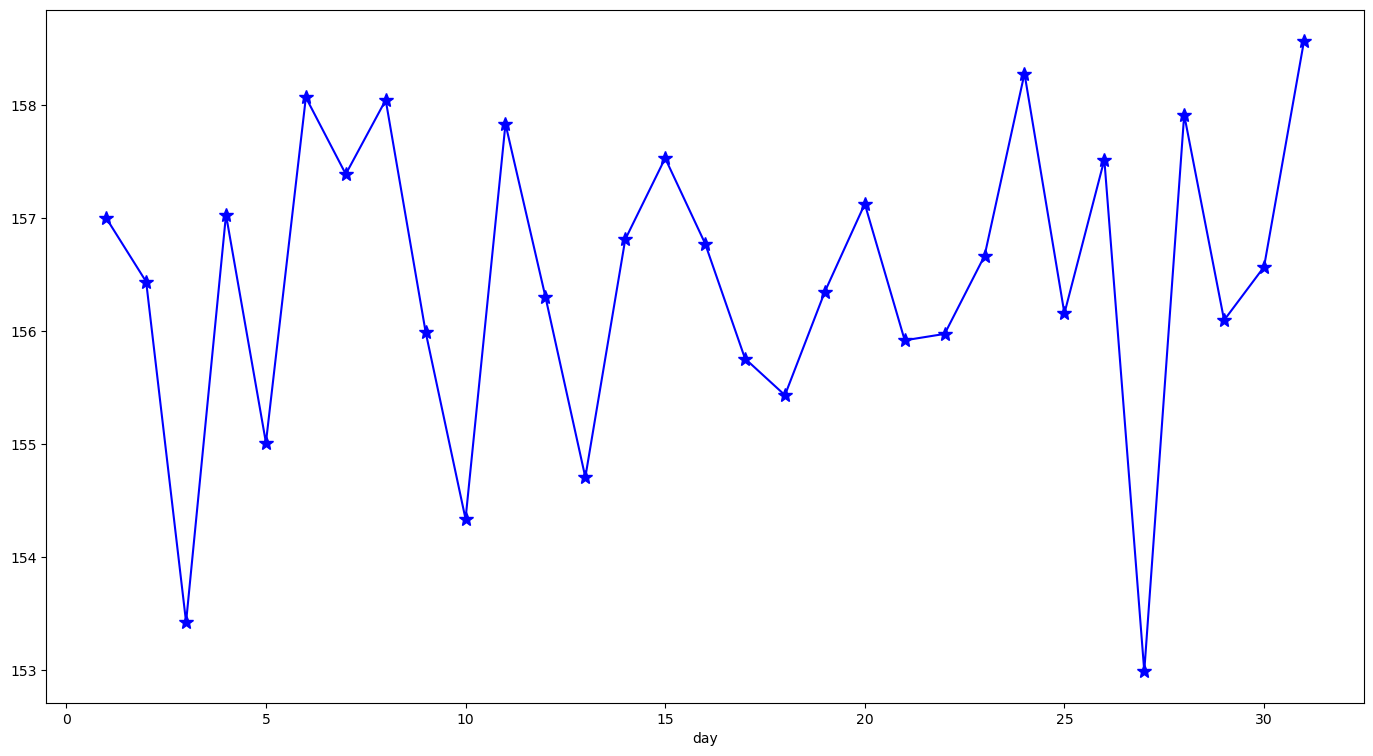

<Figure size 1600x600 with 0 Axes>

In [32]:
data_1.groupby('day')['Sales'].mean().plot(marker='*',markersize=10,color='blue')
plt.figure(figsize=[16,6])
plt.show()

Interpretation: #Avg sales are high on 31st day and low on 27th day of each month

In [33]:
data.groupby('day')['Sales'].mean().sort_values(ascending=False)

day
31    158.563116
24    158.277582
6     158.066467
8     158.043728
28    157.912967
11    157.831967
15    157.529277
26    157.515826
7     157.387962
20    157.124851
4     157.029048
1     156.999402
14    156.811098
16    156.774681
23    156.666054
30    156.568212
2     156.436975
19    156.348949
12    156.304655
25    156.156907
29    156.096690
9     155.992326
22    155.975400
21    155.918919
17    155.757125
18    155.433756
5     155.013906
13    154.708232
10    154.339296
3     153.427490
27    152.993289
Name: Sales, dtype: float64

Interpretation: #Avg sales are high on 31st day and low on 27th day of each month

In [34]:
data = df
data['week'] = data['Order Date'].dt.week
data.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,month,day,week
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,46.00,4.600,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,11,9,46
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,112.01,11.201,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,6,30,27
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,31.15,3.115,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,12,5,49
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,26.20,2.620,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,5,9,19
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,160.00,16.000,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,7,9,28


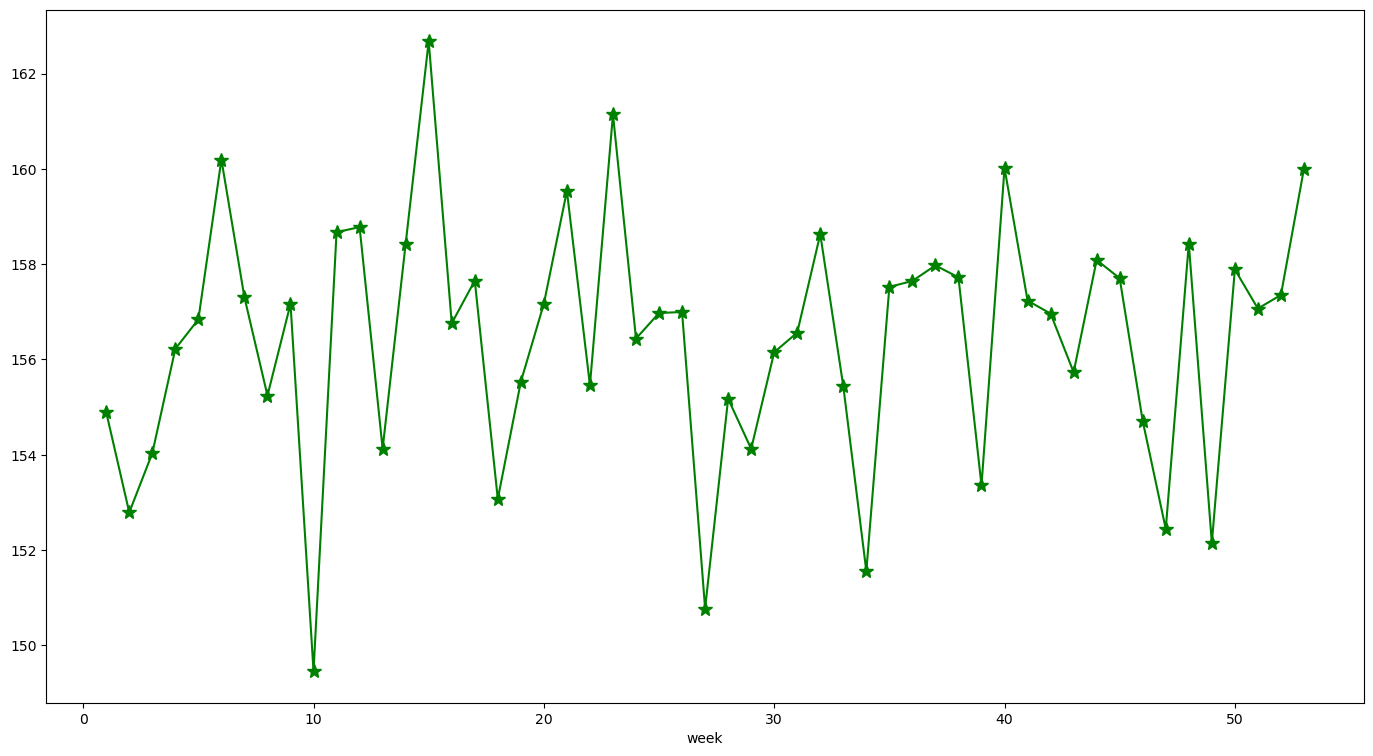

<Figure size 1600x600 with 0 Axes>

In [35]:
data_1.groupby('week')['Sales'].mean().plot(marker='*',markersize=10,color='green')
plt.figure(figsize=[16,6])
plt.show()

Interpretation: #Avg sales are high in 15th week of year and low in 10th week of the year

In [36]:
data.groupby('week')['Sales'].mean().sort_values(ascending=False)

week
15    162.679793
23    161.144628
6     160.196774
40    160.020488
53    160.003697
21    159.538618
12    158.778926
11    158.672228
32    158.629905
48    158.434146
14    158.431316
44    158.088296
37    157.974657
50    157.889210
38    157.723251
45    157.703940
17    157.655246
36    157.648760
35    157.523139
52    157.355263
7     157.304603
41    157.236155
20    157.170502
9     157.167189
51    157.067882
26    156.997021
25    156.975401
42    156.962319
5     156.842213
16    156.759596
31    156.564484
24    156.438884
4     156.223938
30    156.151663
43    155.732365
19    155.531377
22    155.459488
33    155.438632
8     155.242268
28    155.176412
1     154.892100
46    154.707631
13    154.127615
29    154.124494
3     154.033268
39    153.355711
18    153.073998
2     152.790576
47    152.443288
49    152.153171
34    151.557632
27    150.773305
10    149.457561
Name: Sales, dtype: float64

Interpretation: #Avg sales are high in 15th week of year and low in 10th week of the year

In [37]:
data.groupby('Customer Name')['Sales'].mean().sort_values(ascending=False)

Customer Name
Mcclure Schwarz       184.753247
Patterson Brittain    183.571429
Gilmore Norris        182.352941
Green Baptist         181.795455
Leon Sissman          181.344444
                         ...    
Gregory Gibson        133.568182
Mullins Hansen        130.824561
Rojas Schmidt         130.638298
Marks Schneider       128.055556
Morin Zettner         124.750000
Name: Sales, Length: 795, dtype: float64

Interpretation: #Avg_sales are high for Customer - Mcclure Schwarz for the year
               #Avg_sales are low for Customer - Morin Zettner for the year

In [38]:
data.groupby('State')['Sales'].mean().sort_values(ascending=False)

State
Mérida          250.0
Stara Zagora    250.0
Tipaza          236.0
Al Minufiyah    231.0
Galway          231.0
                ...  
Basilicata       54.0
Tanga            54.0
Ibb              54.0
Kabarole         34.0
Gangwon          33.0
Name: Sales, Length: 1094, dtype: float64

In [39]:
data.groupby('Country')['Sales'].mean().sort_values(ascending=False)

Country
Eritrea                             219.500000
South Sudan                         210.000000
United Arab Emirates                194.214286
Papua New Guinea                    178.727273
Sudan                               177.826087
Tajikistan                          176.333333
Bahrain                             174.500000
Taiwan                              172.071429
Mozambique                          171.797872
Uzbekistan                          170.395833
Cote d'Ivoire                       169.559633
Bosnia and Herzegovina              168.647059
Sierra Leone                        168.066667
Afghanistan                         168.000000
Gabon                               166.571429
Paraguay                            165.250000
Tunisia                             164.923077
Denmark                             164.830769
Thailand                            164.233898
Malaysia                            164.210227
Japan                               163.696000
Cambo

Interpretation: #Avg_sales are high for country "Eritrea" for the year
#Avg_sales are low for country "Lesotho" for the year

In [40]:
data.groupby('City')['Sales'].mean().sort_values(ascending=False)

City
Kamina          250.0
Stara Zagora    250.0
Los Patios      250.0
Abilene         250.0
Gandia          250.0
                ...  
Vilhena          33.0
Girón            33.0
Halluin          33.0
Fareham          33.0
Kazerun          33.0
Name: Sales, Length: 3636, dtype: float64

Interpretation:  #Avg_sales are low for states with Avg_sales as Rs 33 for the year

In [41]:
data.groupby('Order Priority')['Shipping Cost'].mean().sort_values(ascending=False)

Order Priority
Low         8.081556
Medium      7.517609
High        6.981001
Critical    6.084012
Name: Shipping Cost, dtype: float64

Interpretation: #Avg_shipping_cost is Rs 8.08 for low priority products
#Avg_shipping_cost is Rs 6.08 for critical priority products

<Axes: xlabel='Sales', ylabel='Profit'>

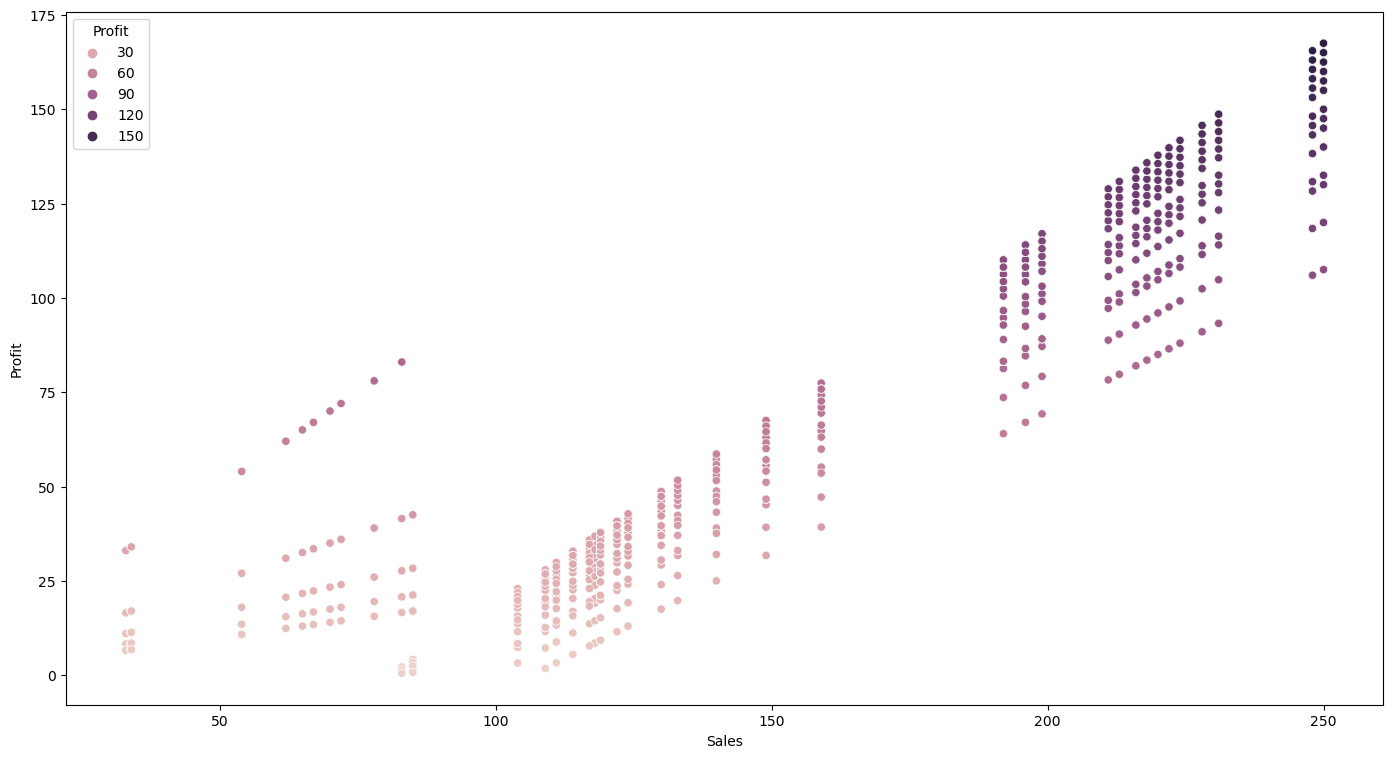

In [42]:
sns.scatterplot(data=df,x='Sales',y=df['Profit'],hue='Profit')

Interpretation:# Profit have grown wrt sales

# Quantitative and Categorical Analysis

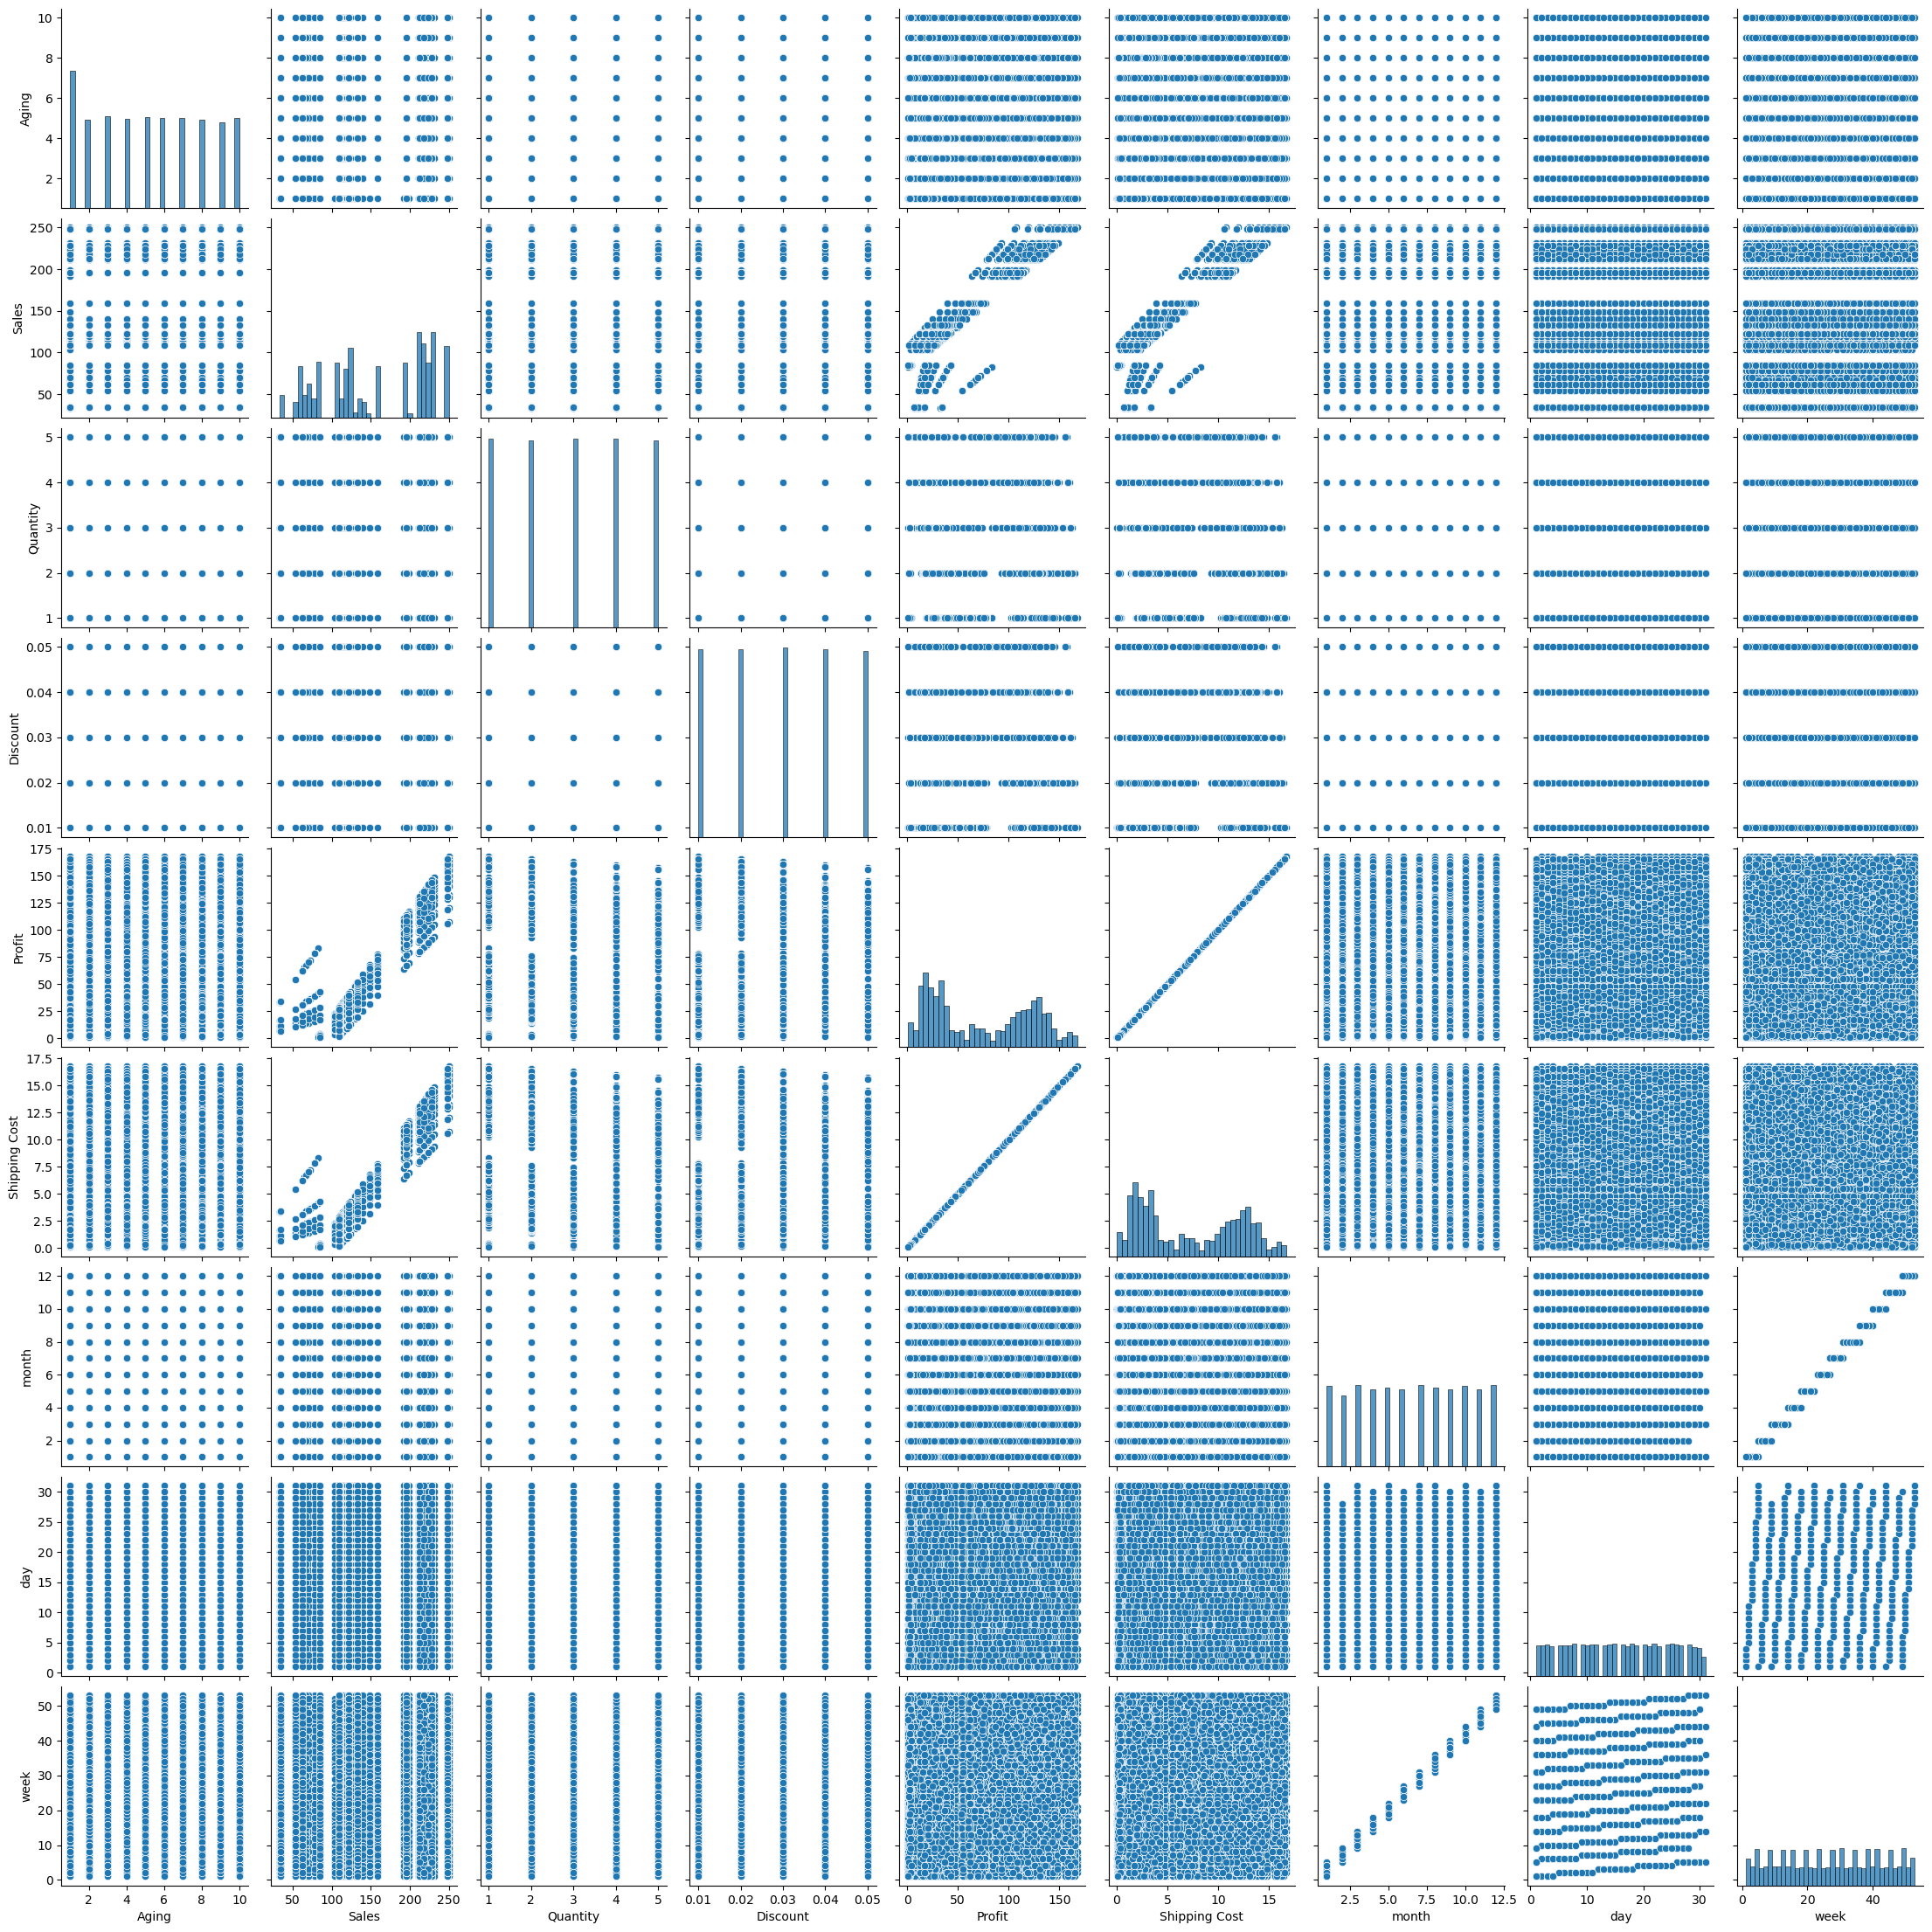

In [43]:
sns.pairplot(df)

# Categorical and Categorical Analysis

In [44]:
count = pd.crosstab(index = df['Product'],columns=df['Discount'])
count

Discount,0.01,0.02,0.03,0.04,0.05
Product,,,,,
Apple Laptop,42,52,49,42,36
Bed Sheets,193,203,212,203,217
Beds,218,191,209,194,217
Bike Tyres,136,171,184,175,160
Car & Bike Care,154,187,164,178,143
Car Body Covers,153,172,173,178,150
Car Mat,159,144,148,189,186
Car Media Players,191,176,161,155,143
Car Pillow & Neck Rest,150,170,190,167,152


inference for example: Apple Laptop 1% Discount - 42 laptops sold 2% Discount - 52 laptops sold 3% Discount - 49 laptops sold 4% Discount - 42 laptops sold 5% Discount - 36 laptops sold

In [45]:
count1 = pd.crosstab(index = df['Product Category'],columns=df['Order Priority'])
count1

Order Priority,Critical,High,Low,Medium
Product Category,,,,
Auto & Accessories,1734,3413,0,2358
Electronic,742,1269,0,690
Fashion,0,6809,2424,21542
Home & Furniture,1456,4010,0,4843


In [46]:
count2 = pd.crosstab(index = df['Product Category'],columns=df['Product'])
count2

Product,Apple Laptop,Bed Sheets,Beds,Bike Tyres,Car & Bike Care,Car Body Covers,Car Mat,Car Media Players,Car Pillow & Neck Rest,Car Seat Covers,Car Speakers,Casula Shoes,Curtains,Dinner Crockery,Dinning Tables,Fans,Formal Shoes,Fossil Watch,Iron,Jeans,Keyboard,LCD,LED,Mixer/Juicer,Mouse,Running Shoes,Samsung Mobile,Shirts,Shoe Rack,Sneakers,Sofa Covers,Sofas,Speakers,Sports Wear,Suits,T - Shirts,Tablet,Titak watch,Towels,Tyre,Umbrellas,Watch
Product Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Auto & Accessories,0,0,0,826,826,826,826,826,829,827,826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,893,0,0
Electronic,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,221,0,0,221,0,221,224,224,224,221,0,221,0,0,0,0,0,261,0,0,0,221,0,0,0,0,221
Fashion,0,0,0,0,0,0,0,0,0,0,0,2795,0,0,0,0,2795,2796,0,2794,0,0,0,0,0,2795,0,2794,0,2795,0,0,0,2827,2795,2794,0,2795,0,0,0,0
Home & Furniture,0,1028,1029,0,0,0,0,0,0,0,0,0,1028,1053,1029,0,0,0,0,0,0,0,0,0,0,0,0,0,1029,0,1027,1029,0,0,0,0,0,0,1028,0,1029,0


In [47]:
count3 = pd.crosstab(index = df['Region'],columns=df['Segment'])
count3

Segment,Consumer,Corporate,Home Office
Region,,,
Africa,2381,1312,894
Canada,202,110,72
Caribbean,828,507,355
Central,5782,3321,2014
Central Asia,1042,613,393
EMEA,2538,1574,917
East,1469,877,502
North,2468,1487,830
North Asia,1170,708,460


# Feature Engineering

In [48]:
# Encoding the Categorical Variables for further analysis

In [49]:
df_cat2 = df_cat.drop(['Order ID','Customer ID','Customer Name'],axis=1)

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
LE=LabelEncoder()

In [52]:
df_cat2['Ship Mode']=LE.fit_transform(df_cat2['Ship Mode'])
df_cat2['Product Category']=LE.fit_transform(df_cat2['Product Category'])
df_cat2['Product']=LE.fit_transform(df_cat2['Product'])
df_cat2['Order Priority']=LE.fit_transform(df_cat2['Order Priority'])
df_cat2['Segment']=LE.fit_transform(df_cat2['Segment'])
df_cat2['Country']=LE.fit_transform(df_cat2['Country'])
df_cat2['Region']=LE.fit_transform(df_cat2['Region'])
df_cat2['City']=LE.fit_transform(df_cat2['City'])
df_cat2['State']=LE.fit_transform(df_cat2['State'])

In [53]:
df_encoded_final = pd.concat([df_num,df_cat2],axis=1)

In [54]:
df_correlation=df_encoded_final.corr()
df_correlation

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost,Ship Mode,Product Category,Product,Order Priority,Segment,City,State,Country,Region
Aging,1.000000,0.014840,-0.002432,0.000129,0.015236,0.015236,0.087930,0.067297,-0.012555,0.055547,-0.001588,-0.005334,0.000676,0.004653,0.000203
Sales,0.014840,1.000000,-0.000512,-0.007250,0.921502,0.921502,0.158570,-0.036603,0.169547,0.090824,0.006999,-0.004865,0.003938,0.000103,0.006178
Quantity,-0.002432,-0.000512,1.000000,0.007170,-0.176294,-0.176294,-0.001106,0.003661,0.001831,-0.004972,-0.004001,0.003985,0.000284,0.000686,0.009666
Discount,0.000129,-0.007250,0.007170,1.000000,-0.119111,-0.119111,0.003669,0.002576,-0.002428,0.007022,-0.001164,-0.004208,-0.000263,-0.003054,-0.000490
Profit,0.015236,0.921502,-0.176294,-0.119111,1.000000,1.000000,0.143383,-0.007396,0.195918,0.077434,0.009699,-0.008342,0.003887,-0.000129,0.005220
Shipping Cost,0.015236,0.921502,-0.176294,-0.119111,1.000000,1.000000,0.143383,-0.007396,0.195918,0.077434,0.009699,-0.008342,0.003887,-0.000129,0.005220
Ship Mode,0.087930,0.158570,-0.001106,0.003669,0.143383,0.143383,1.000000,0.688723,0.443866,0.404562,0.005935,-0.001951,0.008972,-0.008987,-0.002691
Product Category,0.067297,-0.036603,0.003661,0.002576,-0.007396,-0.007396,0.688723,1.000000,0.307120,0.197508,0.006509,-0.013451,0.006973,-0.013043,-0.010196
Product,-0.012555,0.169547,0.001831,-0.002428,0.195918,0.195918,0.443866,0.307120,1.000000,0.166202,0.007151,-0.002037,0.002247,-0.004559,0.004544
Order Priority,0.055547,0.090824,-0.004972,0.007022,0.077434,0.077434,0.404562,0.197508,0.166202,1.000000,0.014027,0.009772,0.014620,0.002219,-0.003372


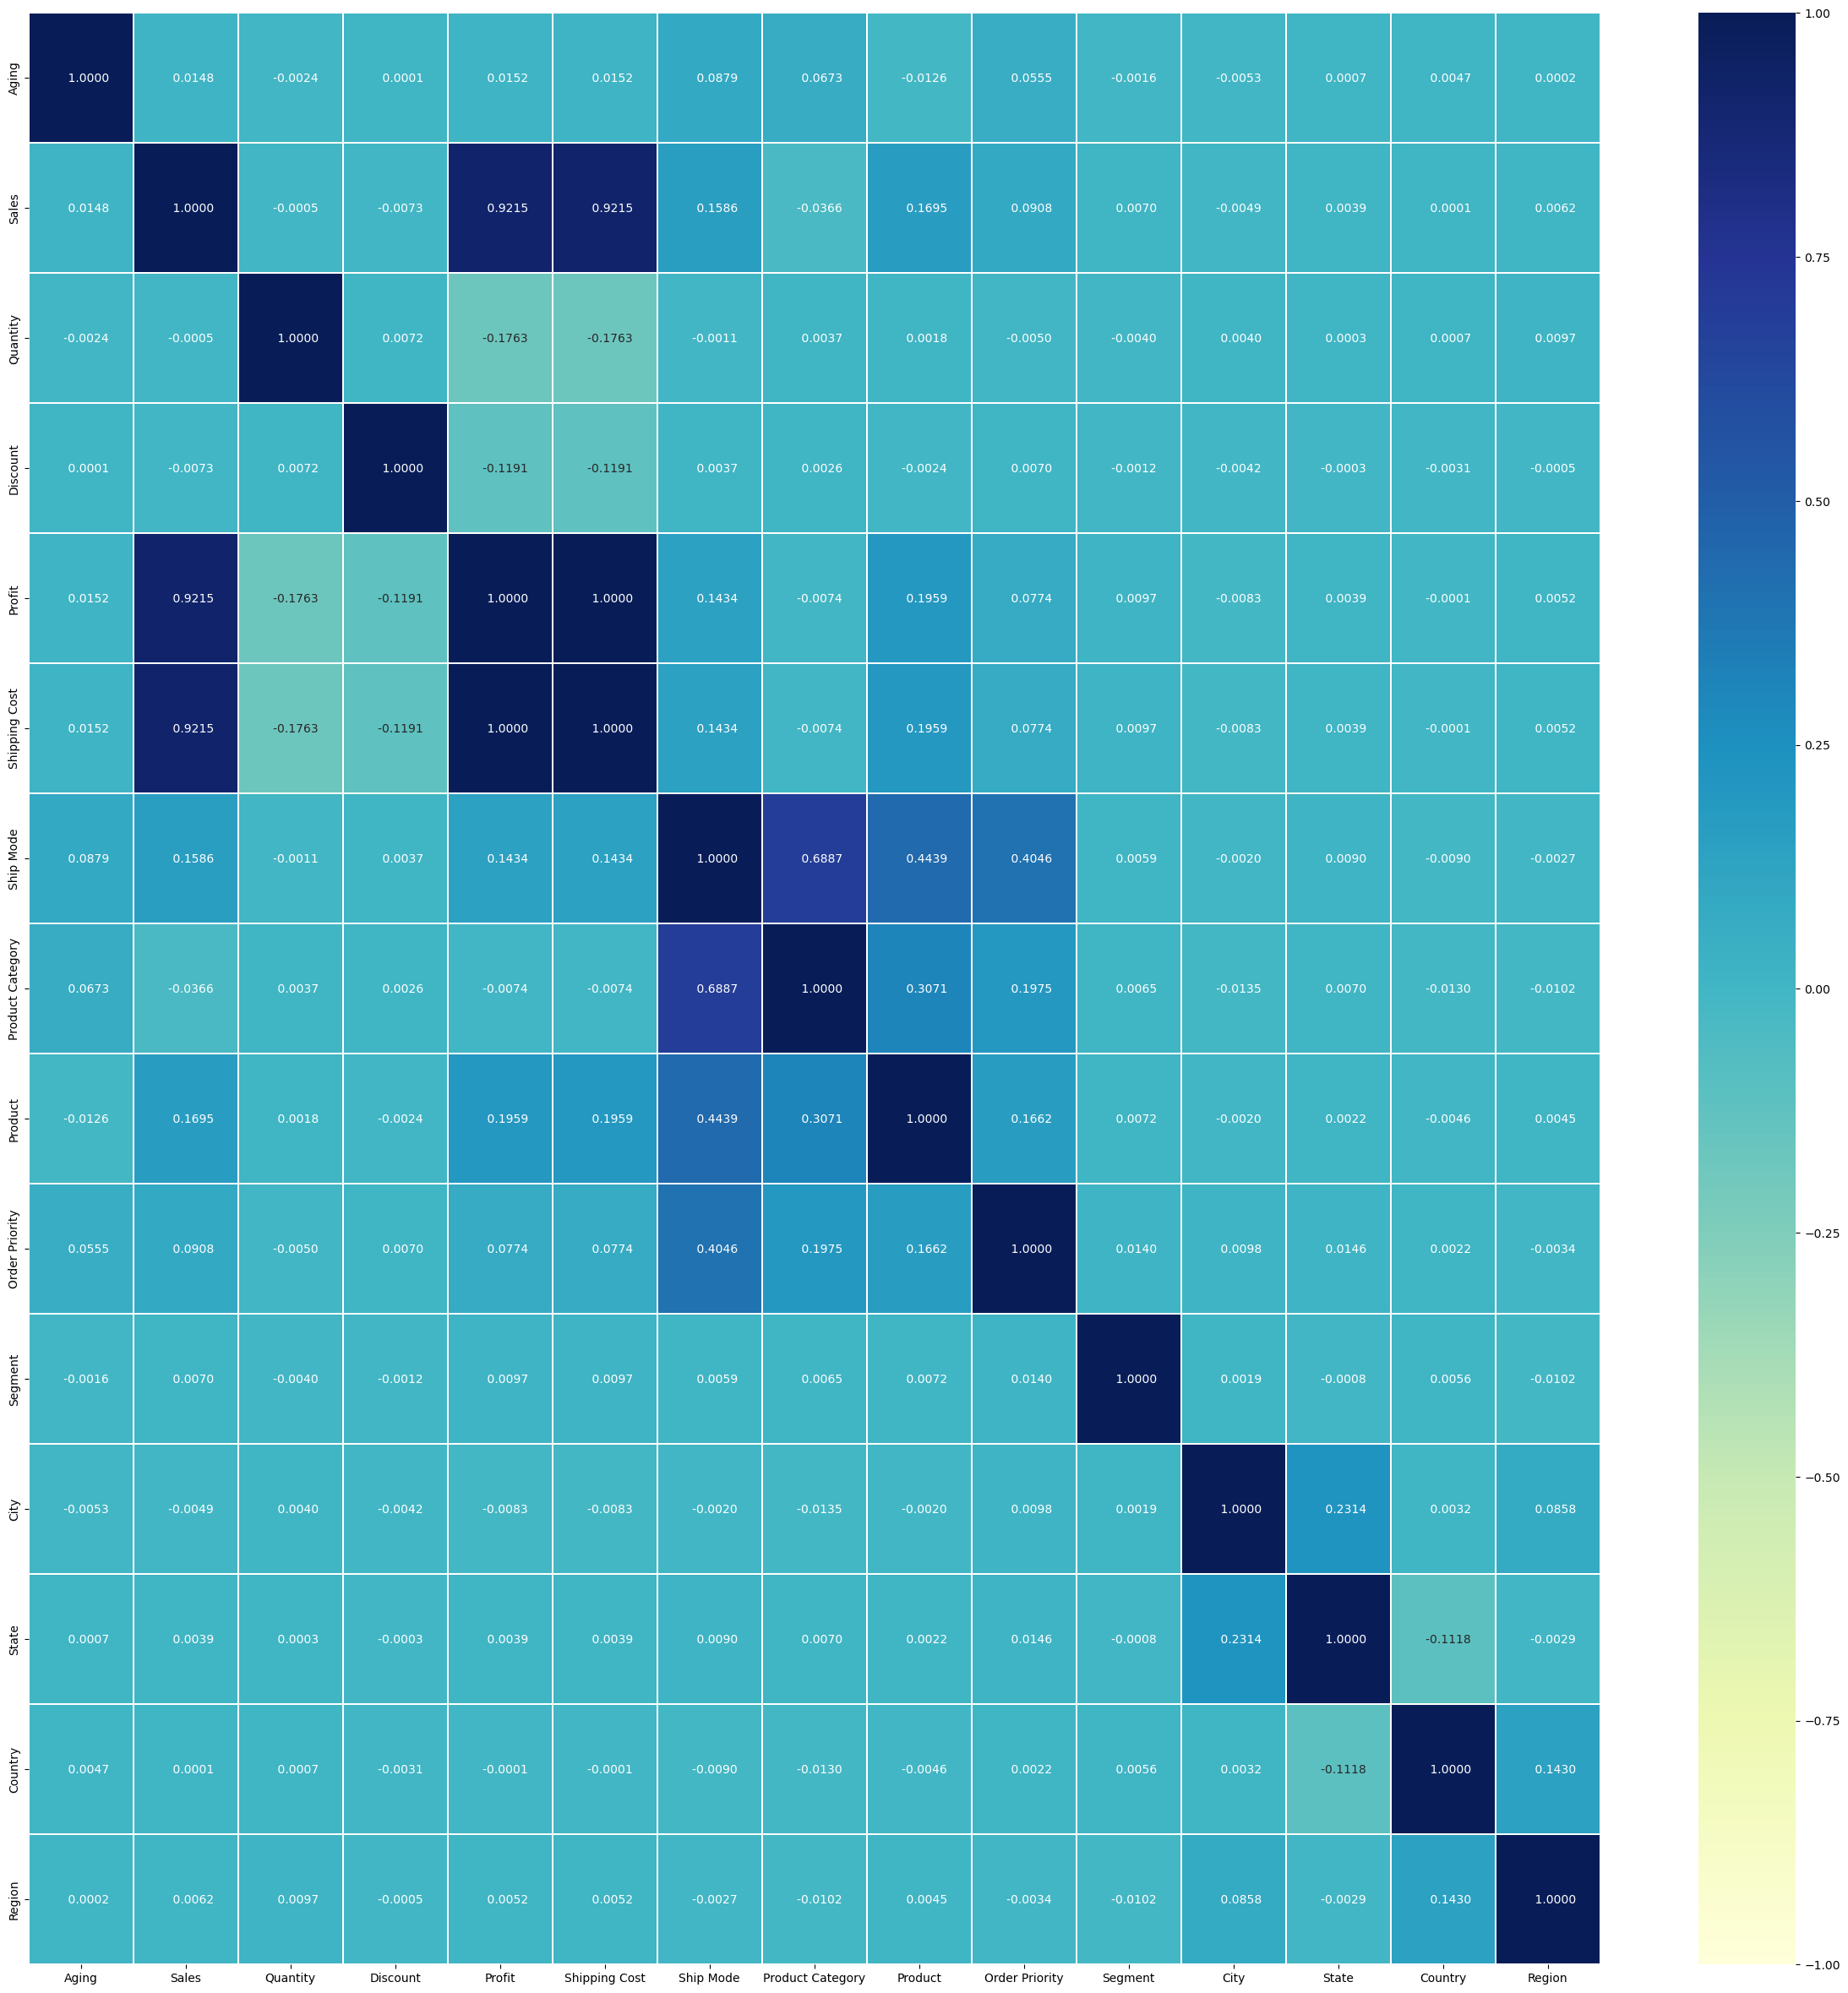

In [55]:
fig,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df_correlation, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()

In [56]:
mean = np.mean(df)
std = np.std(df)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is Aging              5.255040
Sales            156.431683
Quantity           2.997309
Discount           0.029971
Profit            72.721836
Shipping Cost      7.272184
month              6.537083
day               15.745564
week              27.051453
dtype: float64
std. deviation is Order Date       105 days 12:14:24.157900168
Shipping Date    105 days 13:07:18.738756190
Aging                               2.959876
Sales                              65.780732
Quantity                            1.413439
Discount                            0.014114
Profit                             49.098849
Shipping Cost                       4.909885
month                               3.451968
day                                 8.786009
week                               15.078793
dtype: object


In [57]:
print("Mean value of Sales",df.Sales.mean())
print("Standard deviation of Sales",df.Sales.std())
print("Minimum value of Sales",df.Sales.min())
print("Maximum value of Sales",df.Sales.max())

Mean value of Sales 156.4316825891987
Standard deviation of Sales 65.78137370587001
Minimum value of Sales 33
Maximum value of Sales 250


In [58]:
mean_Sales=np.mean(df["Sales"])
std_price=np.std(df["Sales"])
print("Mean Sales: ",mean_Sales, '\t','\t', 'Standard Deviation: ', std_price)

Mean Sales:  156.4316825891987 	 	 Standard Deviation:  65.78073243374733


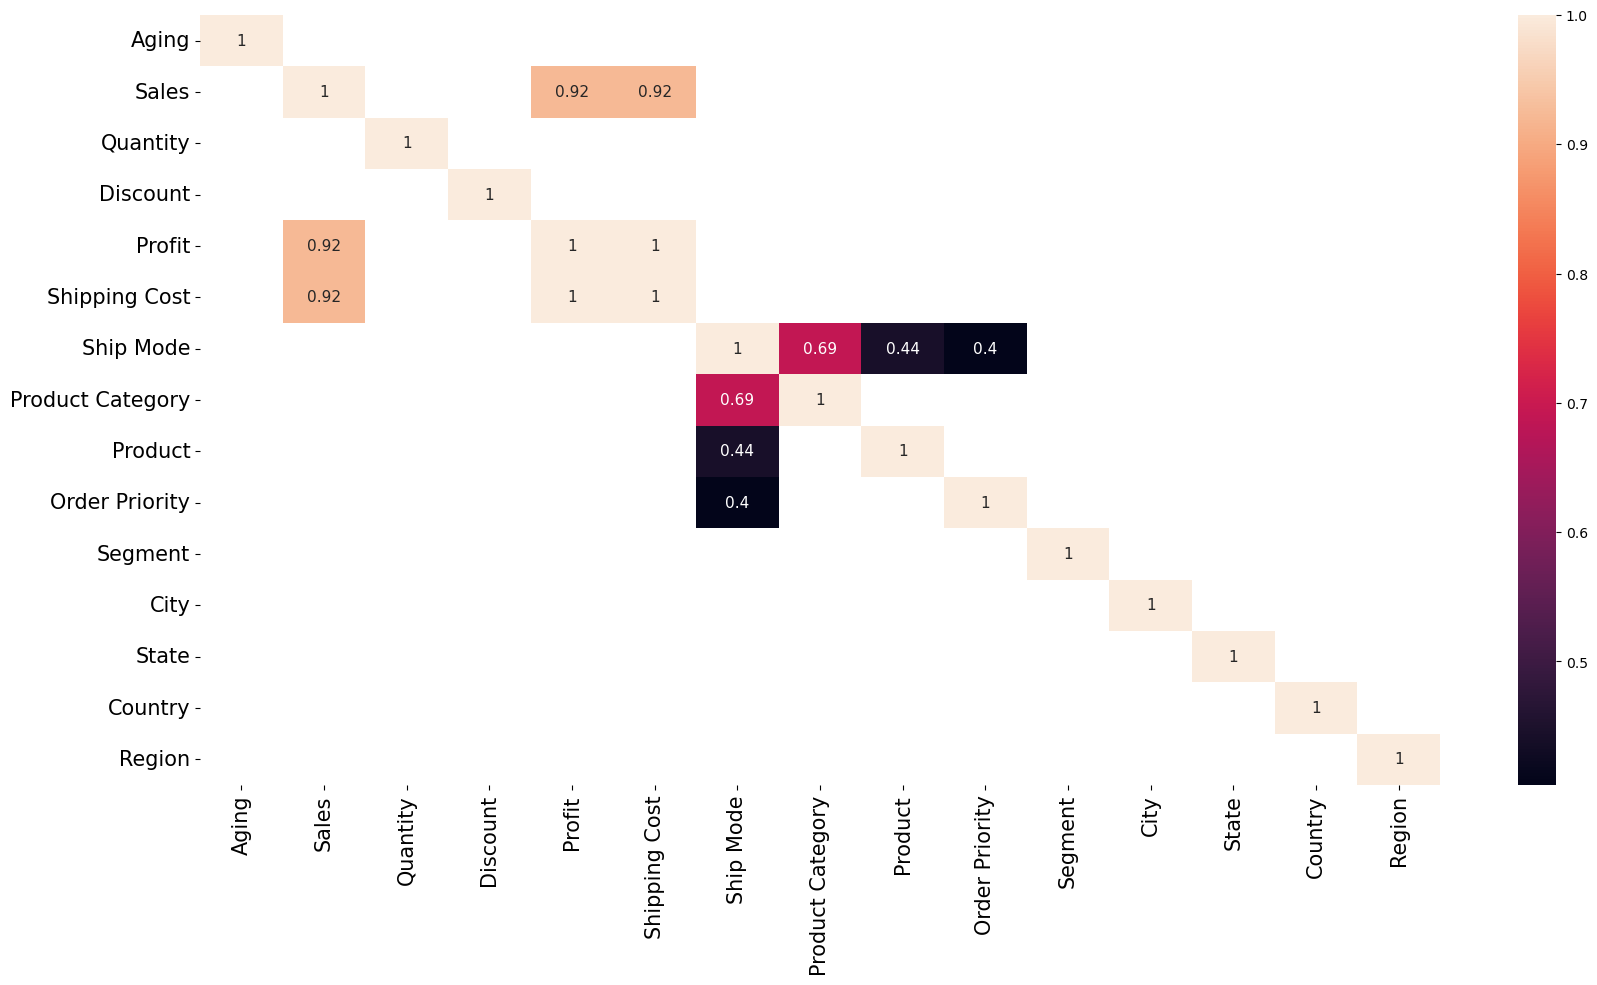

In [59]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df_correlation[np.abs(df_correlation) > 0.4] ,annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

# QQ Plot

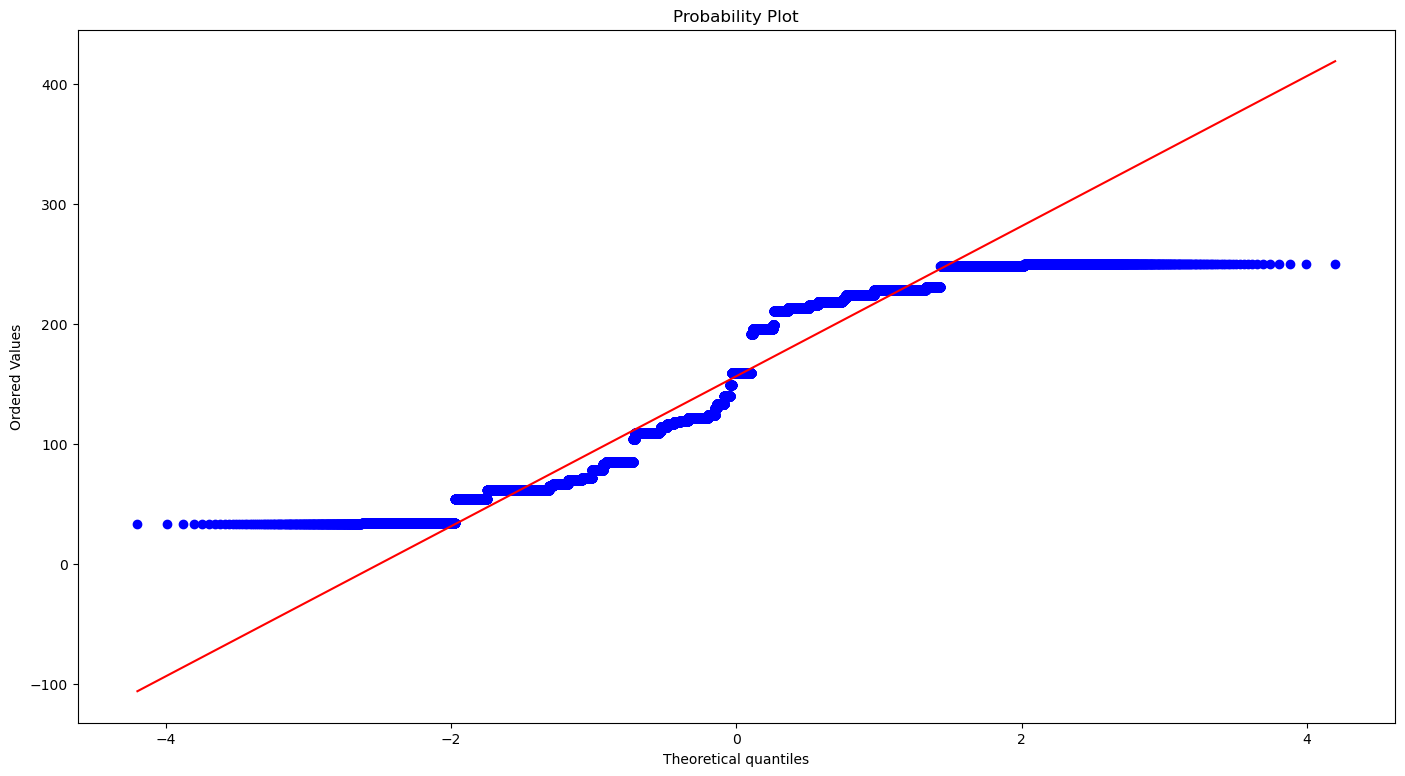

In [60]:
import pylab

import scipy.stats as stats

measurements = df['Sales']

stats.probplot(measurements, dist="norm", plot=pylab);

In [61]:
X = df_encoded_final.drop(columns='Sales',axis=1)
y = df_encoded_final['Sales']

In [62]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=49)

In [63]:
import scipy.stats as stats

Statistical test to prove the data is split into 70:30

H0: Mean for X = mean for X_train H1: Mean for X != mean for X_train if pvalue<0.05 we will reject H0

In [64]:
stats.ttest_ind(X,X_train)

Ttest_indResult(statistic=array([ 0.19493409,  0.13436954,  0.36660266, -0.05892777, -0.05892777,
        0.29620131, -0.01057165,  0.12868223,  0.45026922,  0.11048957,
       -0.09713325,  0.4814618 , -0.00799722, -0.06914753]), pvalue=array([0.84544497, 0.89311066, 0.71391626, 0.95300976, 0.95300976,
       0.76707701, 0.99156522, 0.89760938, 0.65251739, 0.91202136,
       0.92262078, 0.63018946, 0.99361922, 0.94487234]))

In [65]:
stats.ttest_ind(X,X_test)

Ttest_indResult(statistic=array([-0.47743953, -0.32888856, -0.89767676,  0.14443114,  0.14443114,
       -0.72578935,  0.0259275 , -0.31520611, -1.10520898, -0.27043463,
        0.23803804, -1.1794541 ,  0.01955868,  0.16921342]), pvalue=array([0.63305087, 0.74224104, 0.36936142, 0.8851605 , 0.8851605 ,
       0.46797067, 0.97931525, 0.75260624, 0.26907337, 0.78682681,
       0.81185238, 0.23822196, 0.98439549, 0.86562933]))

# Fit a base mode

In [66]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [67]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:
    predictions = model.predict(X_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 21.63
RMSE of random forest = 0.01
RMSE of decision tree = 0.00


In [68]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(X_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape 
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')
    
 

Accuracy of lin_reg= 81.27 %
Accuracy of random forest= 100.00 %
Accuracy of decision tree= 100.00 %


Interpretation: These results are interesting: it seems that decision tree is by far the best model, as its error is the lowest. However, at this point we are
only evaluating our models on the train set, so the risk of overfitting for decision trees is quite high. To understand better the performances
of the models we can use an alternative strategy: cross-validation

In [69]:
pd.options.display.max_columns = None
# display all rows of the dataframe
pd.options.display.max_rows = None
# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format
# import train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [70]:
# print the shape of train and test sets
print("X_train",X_train.shape)
print("y_test",y_test.shape)

X_train (35903, 14)
y_test (15387,)


In [71]:
import statsmodels.api as sm

In [72]:
X_constant= sm.add_constant(X_train)
lin_reg= sm.OLS(y_train,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 2.309e+04
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:03:30   Log-Likelihood:            -1.6107e+05
No. Observations:               35903   AIC:                         3.222e+05
Df Residuals:                   35889   BIC:                         3.223e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               28.8295      0.677     42.575      0.000      27.502      30.157
Aging               -0.0404      0.039     -1.048      0.295      -0.116       0.035
Quantity             7.7938      0.082     95.542      0.000       7.634       7.954
Discount           489.7254      8.079     60.618      0.000     473.890     505.560
Profit               1.2677      0.002    522.806      0.000       1.263       1.272
Shipping Cost        0.1268      0.000    522.806      0.000       0.126       0.127
Ship Mode            5.8477      0.166     35.172      0.000       5.522       6.174
Product Category    -6.3399      0.176    -36.046      0.000      -6.685      -5.995
Product             -0.1960      0.011    -17.442      0.000      -0.218      -0.174
Order Priority      -0.0022      0.115     -0.019      0.984      -0.229       0.224
Segment             -0.2091      0.148     -1.409      0.159      -0.500       0.082
City                 0.0001      0.000      1.230      0.219   -8.47e-05       0.000
State               -0.0006      0.000     -1.643      0.100      -0.001       0.000
Country             -0.0009      0.002     -0.347      0.729      -0.006       0.004
Region               0.0003      0.032      0.011      0.991      -0.063       0.063
==============================================================================
Omnibus:                     5619.903   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9181.647
Skew:                          -1.065   Prob(JB):                         0.00
Kurtosis:                       4.265   Cond. No.                     1.24e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [74]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:
    predictions = model.predict(X_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)


RMSE of lin_reg = 21.49
RMSE of random forest = 0.02
RMSE of decision tree = 0.00


In [75]:
for i, model in models:
    predictions = model.predict(X_train)
    errors = abs(predictions - y_train)
# Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
    accuracy = 100 - mape
#print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 81.45 %
Accuracy of random forest= 100.00 %
Accuracy of decision tree= 100.00 %


# Model comparison

In [76]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [77]:
results[8]

{'fit_time': array([0.11129689, 0.10995269, 0.10259366, 0.1022799 , 0.110286  ,
        0.11433458, 0.10323715, 0.10334849, 0.09689784, 0.10135818]),
 'score_time': array([0.00302339, 0.00199938, 0.00199437, 0.00199723, 0.00199699,
        0.00299239, 0.00199509, 0.00200295, 0.00195789, 0.00199652]),
 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

Now I want to compute for each combination the mean and std, so that to put into a dataframe all the metrics and easily compare them

In [78]:
#THIS IS FOR Linear regression
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accu
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()
#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()
#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [79]:
modelDF = pd.DataFrame({
 'Model' : ['Linear Regression', 'Random Forest', 'Decision Trees'],
 'RMSE_mean' : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
 'RMSE_std' : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
 'MAE_mean' : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
 'MAE_std' : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
 'r2_mean' : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
 'r2_std' : [LR_r2_std, RF_r2_std, DT_r2_std],
 }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])
modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
2,Decision Trees,0.067166,0.013534,-0.000000,0.000000,1.000000,0.000000
1,Random Forest,0.059722,0.005195,0.001252,0.000704,0.999999,0.000001
0,Linear Regression,21.498839,10.585425,16.134329,0.164341,0.893039,0.002862


In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10],
'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]
grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [81]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

3.650487813406745 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
3.4375046570450287 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
2.317096873815901 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
2.1594210290151143 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.8854099231772425 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.5546864732696218 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.17076635930169076 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.11778143759500978 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.8192044092165788 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.6394610622835604 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.18988261805444082 {'bootstrap': True, 'm

In [82]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=10, n_estimators=25,
                      n_jobs=-1)

In [83]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape 
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 100.0 %


In [84]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.0


# Randomized search

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'min_samples_split': min_samples_split}
pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [86]:
rf_random = RandomizedSearchCV(estimator=forest , param_distributions=random_grid , n_iter=10 , cv=5 , verbose=2 , random_state=51 , n_jobs=1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=45, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END max_depth=45, max_features

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=51, verbose=2)

In [87]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
     print(np.sqrt(-mean_score), params)

nan {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
nan {'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45}
nan {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
nan {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45}
nan {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
nan {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 23}
nan {'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 23}
nan {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 23}
nan {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
nan {'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}


In [88]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='auto', min_samples_split=5,
                      n_estimators=110, n_jobs=-1)

In [89]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 110,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 23}

In [90]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='auto', min_samples_split=5,
                      n_estimators=110, n_jobs=-1)

Now, let's find out about the performance metrics of our new model: MAPE and RMSE

In [91]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(X_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape 
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 100.0 %


In [92]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.01


In conclusion, the metrics for our best models on the training set after our hyperparameter fine-tuning are the following:
1. Grid-search:
RMSE: 181304.01
accuracy (MAPE): 100 %
1. Randomized Search:
RMSE: 291065.23
accuracy: 100 %

In [93]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_
#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)
#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)
#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])
#see df
print(df)

    importance           feature
0     0.457461     Shipping Cost
1     0.419067            Profit
2     0.107176           Product
3     0.007641  Product Category
4     0.004326         Ship Mode
5     0.003367          Quantity
6     0.000947          Discount
7     0.000014             Aging
8     0.000000    Order Priority
9     0.000000              City
10    0.000000           Country
11    0.000000             State
12    0.000000           Segment
13    0.000000            Region


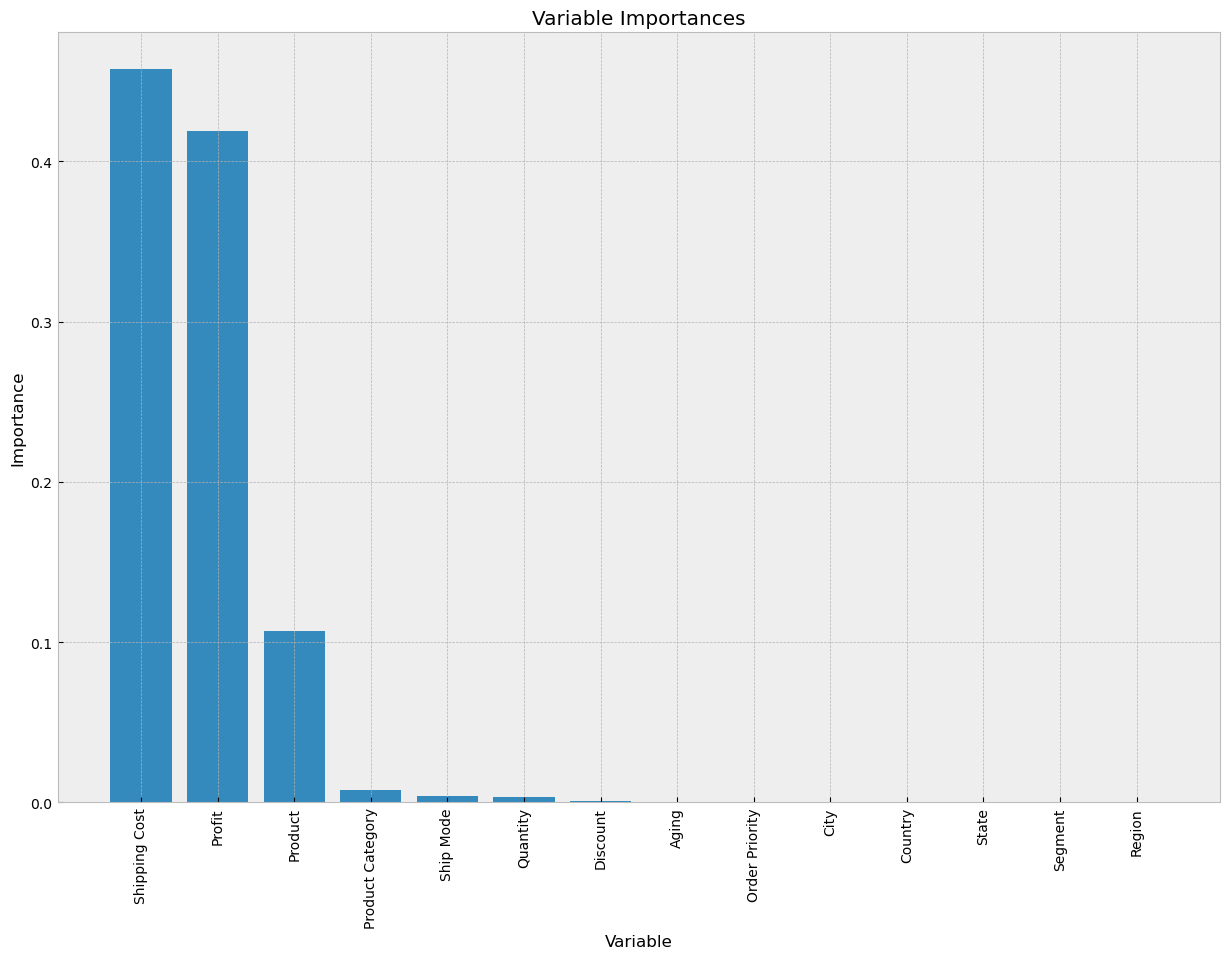

In [94]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))
# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

A future aim may be to cut the less relevant features (let's say everything after 'car' in terms of importance), estimate a new model and
compare it with the old ones. I reckon it would lose predictive power, but on the other hand it would gain in terms of training speed

In [95]:
#Evaluate best model on the test set

In [96]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.02


In [97]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape 
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 100.0 %


Future goals:
more automation: write a couple of functions to speed up the pre-processing part; Build a pipeline to automate the preprocessing
transformations.